In [1]:
"""

"""
from pprint import pprint
from json import dumps
from coinbase.rest import RESTClient
from coinbase.rest.types.accounts_types import ListAccountsResponse
from coinbase.rest.types.product_types import GetProductCandlesResponse
import pandas as pd
from dotenv import load_dotenv
import os
load_dotenv()

client = RESTClient(key_file=os.getenv('COINBASE_API_KEY_FILE'))


In [2]:
accounts: ListAccountsResponse = client.get_accounts()

# pprint(accounts.to_dict(), indent=2)


accounts.accounts

[{'uuid': '5018c40c-69b4-5fdc-bfa4-c520c4266a6f', 'name': 'AAVE Wallet', 'currency': 'AAVE', 'available_balance': {'value': '65.5372021532553941', 'currency': 'AAVE'}, 'default': True, 'active': True, 'created_at': '2024-11-24T17:17:42.794Z', 'updated_at': '2024-11-24T17:17:42.794Z', 'deleted_at': None, 'type': 'ACCOUNT_TYPE_CRYPTO', 'ready': True, 'hold': {'value': '0', 'currency': 'AAVE'}, 'retail_portfolio_id': 'c6178073-3d59-5f24-8d75-2df8c3d375c8'},
 {'uuid': 'cd321efa-9174-504c-8fe9-4239c310555e', 'name': 'BCH Wallet', 'currency': 'BCH', 'available_balance': {'value': '0', 'currency': 'BCH'}, 'default': True, 'active': True, 'created_at': '2024-11-06T06:37:14.234Z', 'updated_at': '2024-11-06T06:37:14.234Z', 'deleted_at': None, 'type': 'ACCOUNT_TYPE_CRYPTO', 'ready': True, 'hold': {'value': '0', 'currency': 'BCH'}, 'retail_portfolio_id': 'c6178073-3d59-5f24-8d75-2df8c3d375c8'},
 {'uuid': '1d8b2a2c-7ce6-5a65-8449-f4f31226e564', 'name': 'MATIC Wallet', 'currency': 'MATIC', 'availabl

In [3]:
from datetime import datetime, timedelta

class CBGranularity:
    ONE_MINUTE = 'ONE_MINUTE'
    FIVE_MINUTE = 'FIVE_MINUTE'
    FIFTEEN_MINUTE = 'FIFTEEN_MINUTE'
    THIRTY_MINUTE = 'THIRTY_MINUTE'
    ONE_HOUR = 'ONE_HOUR'
    TWO_HOUR = 'TWO_HOUR'
    SIX_HOUR = 'SIX_HOUR'
    ONE_DAY = 'ONE_DAY'

# Get the price history for a specific product (e.g., BTC-USD)
product_id = 'BTC-USD'
end = datetime.utcnow()
start = end - timedelta(days=1)
granularity = '3600'  # 1 hour
start_timestamp = str(int(start.timestamp()))
end_timestamp = str(int(end.timestamp()))
price_history = client.get_candles(product_id, start=start_timestamp, end=end_timestamp, granularity=CBGranularity.FIFTEEN_MINUTE)

# Print the price history
pprint(price_history.candles, indent=2)
print(type(price_history.candles))

[ {'start': '1732563000', 'low': '94546.11', 'high': '95203.08', 'open': '95078.17', 'close': '94934.9', 'volume': '191.68799583'},
  {'start': '1732562100', 'low': '94427.44', 'high': '95198.03', 'open': '95196.04', 'close': '95089.51', 'volume': '469.5089124'},
  {'start': '1732561200', 'low': '94792.05', 'high': '95300.34', 'open': '95148.83', 'close': '95203.34', 'volume': '218.57921051'},
  {'start': '1732560300', 'low': '94851.04', 'high': '95188.1', 'open': '94997.36', 'close': '95151.19', 'volume': '282.33821411'},
  {'start': '1732559400', 'low': '94986.68', 'high': '95552.44', 'open': '95453.9', 'close': '94993.98', 'volume': '320.95985597'},
  {'start': '1732558500', 'low': '95421.73', 'high': '95919', 'open': '95660.96', 'close': '95453.89', 'volume': '230.27451973'},
  {'start': '1732557600', 'low': '94935.99', 'high': '95674.15', 'open': '95211.34', 'close': '95660.96', 'volume': '505.59551878'},
  {'start': '1732556700', 'low': '94837.92', 'high': '95332.93', 'open': '94

In [4]:

def coinbase_candles_to_df(resp: GetProductCandlesResponse) -> pd.DataFrame:
    df = pd.DataFrame.from_records(resp.to_dict()['candles'])
    df['time'] = pd.to_datetime(df['start'], unit='s')
    return df


def coinbase_price_history(product_id: str, bar_count: int, granularity: CBGranularity) -> pd.DataFrame:
    start_timestamp = str(int(start.timestamp()))
    end_timestamp = str(int(end.timestamp()))
    price_history = client.get_candles(product_id, start=start_timestamp, end=end_timestamp, granularity=granularity)



In [5]:
import src.code.coinbase as cb
from src.code.coinbase import FetchConfig

cb.get_price_history('ETH-USD', 1000, fetch_config=FetchConfig('ONE_DAY', timedelta(days=1)), end_date=None)



/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  price_data['start'] = pd.to_datetime(price_data['start'], unit='s', origin='unix')
/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  price_data['start'] = pd.to_datetime(price_data['start'], unit='s', origin='unix')
/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_date

,Datetime,low,high,open,close,volume
0,2022-03-02,2914.90,3045.00,2977.72,2948.56,231625.476058
1,2022-03-03,2785.01,2972.07,2948.58,2833.66,191801.944233
2,2022-03-04,2575.00,2835.95,2833.71,2623.07,264628.670918
3,2022-03-05,2589.93,2685.93,2623.08,2665.77,74795.814901
4,2022-03-06,2536.40,2677.00,2665.94,2550.77,81556.050914
...,...,...,...,...,...,...
995,2024-11-21,3034.15,3390.35,3072.33,3359.90,263174.604259
996,2024-11-22,3260.78,3429.69,3360.11,3331.77,168501.028104
997,2024-11-23,3316.55,3500.00,3332.16,3397.51,144344.790744
998,2024-11-24,3286.25,3453.90,3397.51,3365.16,83921.839347


In [6]:
from src.code.yfinance_fetch import get_price_history
import matplotlib.pyplot as plt
gc = get_price_history('GC=F', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
cl = get_price_history('CL=F', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
cl.close.plot()
(cl / gc)[['close']].plot()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


<Axes: xlabel='Datetime'>

In [7]:
import numpy as np
eth = get_price_history('ETH-USD', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
btc = get_price_history('BTC-USD', 3000, fetch_config=FetchConfig('1d', timedelta(days=1)), end_date=None).set_index('Datetime')
close_prices = pd.concat([eth.close, btc.close], axis=1).dropna()
close_prices.columns = ['ETH', 'BTC']
close_prices.ETH = np.log(eth.close / eth.close.shift(1)).cumsum() + 2
close_prices.BTC = np.log(btc.close / btc.close.shift(1)).cumsum()
close_prices = close_prices.dropna()
close_prices['ratio'] = close_prices.ETH - close_prices.BTC
# close_prices = close_prices / close_prices.iloc[0] * 10
close_prices.plot(secondary_y=['ratio'])
close_prices

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,ETH,BTC,ratio
Datetime,,,
2017-11-09 19:00:00-05:00,1.930210,2.357715,-0.427505
2017-11-10 19:00:00-05:00,1.980480,2.317551,-0.337071
2017-11-11 19:00:00-05:00,1.958721,2.251303,-0.292582
2017-11-12 19:00:00-05:00,1.986926,2.348813,-0.361887
2017-11-13 19:00:00-05:00,2.050874,2.360372,-0.309498
...,...,...,...
2024-11-19 19:00:00-05:00,4.259066,5.014800,-0.755735
2024-11-20 19:00:00-05:00,4.348930,5.058005,-0.709075
2024-11-21 19:00:00-05:00,4.340129,5.062997,-0.722868


/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  price_data['start'] = pd.to_datetime(price_data['start'], unit='s', origin='unix')
/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_datetime' with 'unit' when parsing strings is deprecated. In a future version, strings will be parsed as datetime strings, matching the behavior without a 'unit'. To retain the old behavior, explicitly cast ints or floats to numeric type before calling to_datetime.
  price_data['start'] = pd.to_datetime(price_data['start'], unit='s', origin='unix')
/home/brian/repos/streamlit-stock-gui/src/code/coinbase.py:77: FutureWarning: The behavior of 'to_date

<Axes: xlabel='Datetime'>

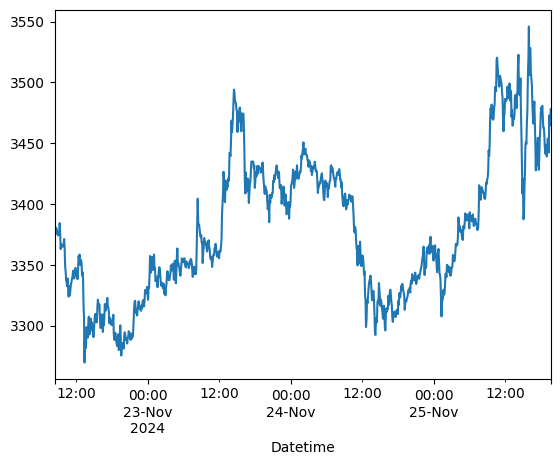

In [4]:
import src.code.settings as settings
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd

fetcher = settings.source_settings.get('coinbase')
num_bars = 1000
end_date = datetime.now().replace(second=0, microsecond=0)
data = fetcher.get_price_history('ETH-USD', num_bars, fetch_config=fetcher.get('5 minute'), end_date=end_date - fetcher.get('5 minute').timedelta)

data = data.set_index('Datetime')

assert not data.index.duplicated().any(), "There are duplicate entries in the datetime index"
assert len(data) == num_bars, f"Expected {num_bars} bars, got {len(data)}"
# Assert that there are no gaps in the datetime index
assert data.index.to_series().diff().dropna().eq(pd.Timedelta('5T')).all(), "There are gaps in the datetime index"

data.close.plot()


In [3]:
import os
print(os.getenv('COINBASE_API_KEY'))

None
